In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dfs = [pd.read_csv('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/data/mitbih_train.csv'),pd.read_csv('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/data/mitbih_test.csv')]
for df in dfs:
    df.columns=list(range(len(df.columns)))

In [3]:
train = dfs[0].rename({187: 'Label'}, axis=1)
test = dfs[1].rename({187: 'Label'}, axis=1)

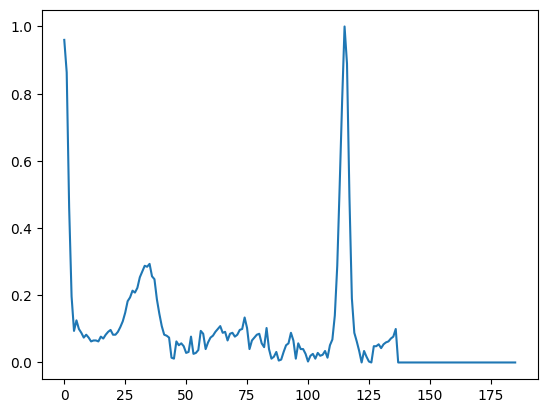

In [4]:
plt.plot(train.iloc[0,:186])

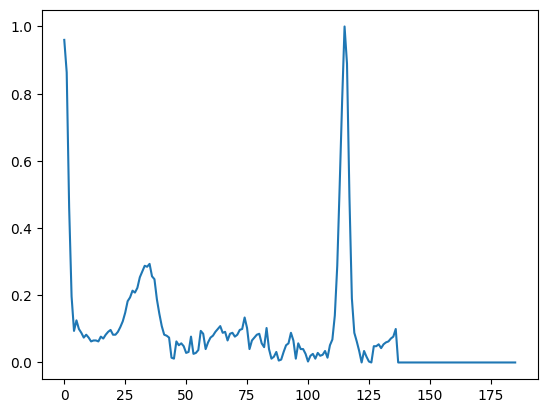

In [5]:
plt.plot(train.iloc[0,:186])

In [6]:
count=test['Label'].value_counts()
print(count)

Label
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [7]:
from sklearn.utils import resample
df_1=train[train['Label']==1]
df_2=train[train['Label']==2]
df_3=train[train['Label']==3]
df_4=train[train['Label']==4]
df_0=(train[train['Label']==0]).sample(n=35000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=35000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=35000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=35000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=35000,random_state=42)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [8]:
df_1=test[test['Label']==1]
df_2=test[test['Label']==2]
df_3=test[test['Label']==3]
df_4=test[test['Label']==4]
df_0=(test[test['Label']==0]).sample(n=15000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=15000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=15000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=15000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=15000,random_state=42)

test=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
count=train['Label'].value_counts()
print(count)

Label
0.0    35000
1.0    35000
2.0    35000
3.0    35000
4.0    35000
Name: count, dtype: int64


In [10]:
count=test['Label'].value_counts()
print(count)

Label
0.0    15000
1.0    15000
2.0    15000
3.0    15000
4.0    15000
Name: count, dtype: int64


In [11]:
x_train=train.drop('Label',axis=1)
y_train=train['Label']

In [12]:
x_test=test.drop('Label',axis=1)
y_test=test['Label']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier   
X = train.drop(['Label'],axis=1)
Y = train['Label']
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1)
AdaBoost.fit(x_train,y_train)
prediction = AdaBoost.predict(x_test)

c:\Users\cnkum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
def speci(cm):
    total=sum(sum(cm))
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
    print('Sensitivity of  Non-ecotic beats (normal beat) ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(total-(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4]))
    print('Specificity of  Non-ecotic beats (normal beat) ', specificity1)
    sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
    print('Sensitivity of  Supraventricular ectopic beats ', sensitivity1 )
    specificity1 = (cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(total-(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4]))
    print('Specificity of  Supraventricular ectopic beats ', specificity1)
    sensitivity1 = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
    print('Sensitivity of  Ventricular ectopic beats  ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[0,0]+cm[3,3]+cm[4,4])/(total-(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4]))
    print('Specificity of  Ventricular ectopic beats ', specificity1)
    sensitivity1 = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
    print('Sensitivity of  Fusion Beats ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[0,0]+cm[4,4])/(total-(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4]))
    print('Specificity of  Fusion Beats ', specificity1)
    sensitivity1 = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
    print('Sensitivity of  Unknown Beats ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[3,3]+cm[0,0])/(total-(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4]))
    print('Specificity of  Unknown Beats ', specificity1)
    

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)
print(metrics.classification_report(y_test, prediction))
accuracy = metrics.accuracy_score(y_test, prediction)
print("Accuracy:",accuracy)
speci(cm)

[[ 4873  6646  2108   756   617]
 [ 1577 11945   951   331   196]
 [  674   611 11106   708  1901]
 [ 1228   466  2695 10611     0]
 [  267   132  1125     0 13476]]
              precision    recall  f1-score   support

         0.0       0.57      0.32      0.41     15000
         1.0       0.60      0.80      0.69     15000
         2.0       0.62      0.74      0.67     15000
         3.0       0.86      0.71      0.77     15000
         4.0       0.83      0.90      0.86     15000

    accuracy                           0.69     75000
   macro avg       0.69      0.69      0.68     75000
weighted avg       0.69      0.69      0.68     75000

Accuracy: 0.69348
Sensitivity of  Non-ecotic beats (normal beat)  0.3248666666666667
Specificity of  Non-ecotic beats (normal beat)  0.7856333333333333
Sensitivity of  Supraventricular ectopic beats  0.7963333333333333
Specificity of  Supraventricular ectopic beats  0.6677666666666666
Sensitivity of  Ventricular ectopic beats   0.7404
Specific

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
GB.fit(x_train,y_train)
GBpred = GB.predict(x_test)
GBcm = metrics.confusion_matrix(y_test, GBpred)
print(GBcm)
print(metrics.classification_report(y_test, GBpred))
GBaccuracy = metrics.accuracy_score(y_test, GBpred)
print("Accuracy:",GBaccuracy)
speci(GBcm)

[[10904  1773  1123   907   293]
 [ 3120 10611   590   428   251]
 [  991   458 12534   783   234]
 [  911    95   637 13246   111]
 [  219    62   221    52 14446]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70     15000
         1.0       0.82      0.71      0.76     15000
         2.0       0.83      0.84      0.83     15000
         3.0       0.86      0.88      0.87     15000
         4.0       0.94      0.96      0.95     15000

    accuracy                           0.82     75000
   macro avg       0.82      0.82      0.82     75000
weighted avg       0.82      0.82      0.82     75000

Accuracy: 0.8232133333333334
Sensitivity of  Non-ecotic beats (normal beat)  0.7269333333333333
Specificity of  Non-ecotic beats (normal beat)  0.8472833333333334
Sensitivity of  Supraventricular ectopic beats  0.7074
Specificity of  Supraventricular ectopic beats  0.8521666666666666
Sensitivity of  Ventricular ectopic beats   0.8356
Specifici

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGBpred = XGB.predict(x_test)

In [ ]:
XGBcm = metrics.confusion_matrix(y_test, XGBpred)
print(XGBcm)
print(metrics.classification_report(y_test, XGBpred))
XGBaccuracy = metrics.accuracy_score(y_test, XGBpred)
print("Accuracy:",XGBaccuracy)
speci(XGBcm)

[[14801   112    43    20    24]
 [ 2999 11828   157     0    16]
 [  459    49 14282   155    55]
 [ 1545     0   902 12553     0]
 [  254    34    51     0 14661]]
              precision    recall  f1-score   support

         0.0       0.74      0.99      0.84     15000
         1.0       0.98      0.79      0.88     15000
         2.0       0.93      0.95      0.94     15000
         3.0       0.99      0.84      0.91     15000
         4.0       0.99      0.98      0.99     15000

    accuracy                           0.91     75000
   macro avg       0.93      0.91      0.91     75000
weighted avg       0.93      0.91      0.91     75000

Accuracy: 0.9083333333333333
Sensitivity of  Non-ecotic beats (normal beat)  0.9867333333333334
Specificity of  Non-ecotic beats (normal beat)  0.8887333333333334
Sensitivity of  Supraventricular ectopic beats  0.7885333333333333
Specificity of  Supraventricular ectopic beats  0.9382833333333334
Sensitivity of  Ventricular ectopic beats   0.95

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)
bagging.fit(x_train, y_train)
baggingpred = bagging.predict(x_test)
bag = metrics.confusion_matrix(y_test, baggingpred)
print(bag)
print(metrics.classification_report(y_test, baggingpred))
bagaccuracy = metrics.accuracy_score(y_test, baggingpred)
print("Accuracy:",bagaccuracy)
speci(bag)

[[14142   478   212   101    67]
 [ 1994 12354   471   165    16]
 [  308   177 14186   310    19]
 [  645   176  1447 12732     0]
 [  231    29    76     0 14664]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88     15000
         1.0       0.93      0.82      0.88     15000
         2.0       0.87      0.95      0.90     15000
         3.0       0.96      0.85      0.90     15000
         4.0       0.99      0.98      0.99     15000

    accuracy                           0.91     75000
   macro avg       0.91      0.91      0.91     75000
weighted avg       0.91      0.91      0.91     75000

Accuracy: 0.9077066666666667
Sensitivity of  Non-ecotic beats (normal beat)  0.9428
Specificity of  Non-ecotic beats (normal beat)  0.8989333333333334
Sensitivity of  Supraventricular ectopic beats  0.8236
Specificity of  Supraventricular ectopic beats  0.9287333333333333
Sensitivity of  Ventricular ectopic beats   0.9457333333333333
Specifici

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)
rfcm = metrics.confusion_matrix(y_test, rfpred)
print(rfcm)
print(metrics.classification_report(y_test, rfpred))
rfaccuracy = metrics.accuracy_score(y_test, rfpred)
print("Accuracy:",rfaccuracy)
speci(rfcm)

[[14906    37    36    10    11]
 [ 4665 10231    57    31    16]
 [ 1057     8 13708   168    59]
 [ 3280     0  1387 10333     0]
 [  596     8    75     0 14321]]
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.75     15000
         1.0       0.99      0.68      0.81     15000
         2.0       0.90      0.91      0.91     15000
         3.0       0.98      0.69      0.81     15000
         4.0       0.99      0.95      0.97     15000

    accuracy                           0.85     75000
   macro avg       0.90      0.85      0.85     75000
weighted avg       0.90      0.85      0.85     75000

Accuracy: 0.8466533333333334
Sensitivity of  Non-ecotic beats (normal beat)  0.9937333333333334
Specificity of  Non-ecotic beats (normal beat)  0.8098833333333333
Sensitivity of  Supraventricular ectopic beats  0.6820666666666667
Specificity of  Supraventricular ectopic beats  0.8878
Sensitivity of  Ventricular ectopic beats   0.91386666666666

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
ETC.fit(x_train, y_train)
ETCpred = ETC.predict(x_test)
ETCcm = metrics.confusion_matrix(y_test, ETCpred)
print(ETCcm)
print(metrics.classification_report(y_test, ETCpred))
ETCaccuracy = metrics.accuracy_score(y_test, ETCpred)
print("Accuracy:",ETCaccuracy)
speci(ETCcm)

[[14951    17    19     4     9]
 [ 5283  9587   114     0    16]
 [ 1295    20 13474   172    39]
 [ 3845     0  1206  9949     0]
 [  737     0    61     0 14202]]
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73     15000
         1.0       1.00      0.64      0.78     15000
         2.0       0.91      0.90      0.90     15000
         3.0       0.98      0.66      0.79     15000
         4.0       1.00      0.95      0.97     15000

    accuracy                           0.83     75000
   macro avg       0.89      0.83      0.83     75000
weighted avg       0.89      0.83      0.83     75000

Accuracy: 0.82884
Sensitivity of  Non-ecotic beats (normal beat)  0.9967333333333334
Specificity of  Non-ecotic beats (normal beat)  0.7868666666666667
Sensitivity of  Supraventricular ectopic beats  0.6391333333333333
Specificity of  Supraventricular ectopic beats  0.8762666666666666
Sensitivity of  Ventricular ectopic beats   0.8982666666666